# Group Proposal 118 - What Causes Heart Disease?
### Steven Son, Yifei Chen, Melissa Wu, Yashita Kapoor









# Introduction:


<img src="https://media.giphy.com/media/26BRv0ThflsHCqDrG/giphy.gif" width = "500"/>

Source: https://media.giphy.com/media/26BRv0ThflsHCqDrG/giphy.gif


**"One person dies every 34 seconds in the United States from cardiovascular disease."**. Heart diseases are one of largest causes of the death in the United States and around the world, but what are indications that someone might be in danger of a heart disease? Heart disease can affect the heart or blood vessels. Many variables such as high blood pressure, and high cholesterol could affect the rate of heart disease. 


**Question:** Using our data and methods we will predict: Which variables are most useful in determining whether or not someone has heart disease, and how accurate is the classification?



The dataset we have chosen is from the UCI Machine Learning Repository, and contains information from Cleveland regarding patient's hearts. 


What each column of the data represents:
* age: age in years
* sex: gender (1 = male; 0 = female)
* chest_pain: chest pain type, Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results, Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
* thalach: maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
* slope: the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat,Value 3: down-sloping
* ca: The number of major vessels (0-3)
* thal: a blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* num: diagnosis of heart disease (angiographic disease status), Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing



# Data Analysis

In [1]:
#Run before continuing
options(repr.matrix.max.rows = 20)
install.packages("naniar")
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr) 
library(gridExtra)
options(repr.matrix.max.rows = 8)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

In [2]:
heart_raw <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
heart_raw

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


The dataset was successfully read into R. We made sure to read the data from the original web source, to make sure anyone with the .ipynb file did not require any additional files. The dataset was first opened in notepad to determine if it was comma separated and had no column names. As you can see the data is pretty difficult to understand, so we must tidy it up. 

In [3]:
heart_column <- rename(heart_raw,age = X1,
                   sex = X2,
                   chest_pain = X3,
                   trestbps = X4,
                   chol = X5,
                   fbs = X6,
                   restecg = X7,
                   thalach = X8,
                   exang = X9,
                   oldpeak = X10,
                   slope = X11,
                   ca = X12,
                   thal = X13,
                   num = X14)
heart_column


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


First and foremost, we have decided to give the columns more readable names. To understand what these columns and their values correspond to, please view our introduction above. 

In [4]:
library(naniar)
#A library that allows us to manipulate data regarding 'NA'
heart_tidy <- heart_column %>%

              mutate(num = ifelse(num >= 1, 1, 0), num = as_factor(num)) %>%
                # If larger or equal to 1, set value to 1, 0 otherwise. 
                # Changed num to <fct> for classification later.


              replace_with_na_all(condition = ~.x == '?') %>%
                # From the naniar library, basically replaces all '?' value in all columns with NA.
            
              na.omit() 
                # Removes all rows that contain NA.
              

heart_tidy

age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Now we get into main tidying of our data. Firstly, we must mutate the last column 'num' which is also the variable we want to classify. 


According to our introduction, column 'num' has values 1 and 0 to determine whether or not this person has a heart disease. Since the original data contains values 1-4, we have
mutate to convert all values > 1 to 1. Then converted the column to a factor. 


Then utilizing the 'naniar' library. We replace all values of '?' with 'NA', and remove all rows that contain NA.


The data is now officially **Tidy**!!

Before we continue with our data exploration, we will split up our data into training and testing data, to ensure that the accuracy of our model is valid. 

In [5]:
heart_split <- initial_split(heart_tidy, prop = 0.75, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

heart_train
heart_test

age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,1
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [6]:
heart_disease_yes_no <- heart_train %>%
                         group_by(num) %>%
                         summarize(n = n()) 
heart_disease_yes_no

num,n
<fct>,<int>
0,120
1,102


We decided to look at how many of our patients have a heart disease (1) and how many do not (0). As we found it might be helpful for classification later on. 

In [7]:
heart_mean_1 <- heart_train %>%
              filter(num == 1) %>%
              select(-sex, -chest_pain, -fbs, -restecg, -exang, -slope, -ca, -thal, -num) %>%
              map_df(mean)


heart_mean_1


heart_mean_0 <- heart_train %>%
              filter(num == 0) %>%
              select(-sex, -chest_pain, -fbs, -restecg, -exang, -slope, -ca, -thal, -num) %>%
              map_df(mean)


heart_mean_0



age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56.38235,135.2745,250.902,137.1275,1.559804


age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.475,129.4,238.5667,158.775,0.5791667


We also decided to take a look at the mean value of all **numeric** predictors people with heart disease and people without. 
As we believed that from the information we learned in class, that classifaction works best with numeric predictors. Overall, we felt this information would be useful
in determining which predictors would be the best in determining if a person has a heart disease or not. 

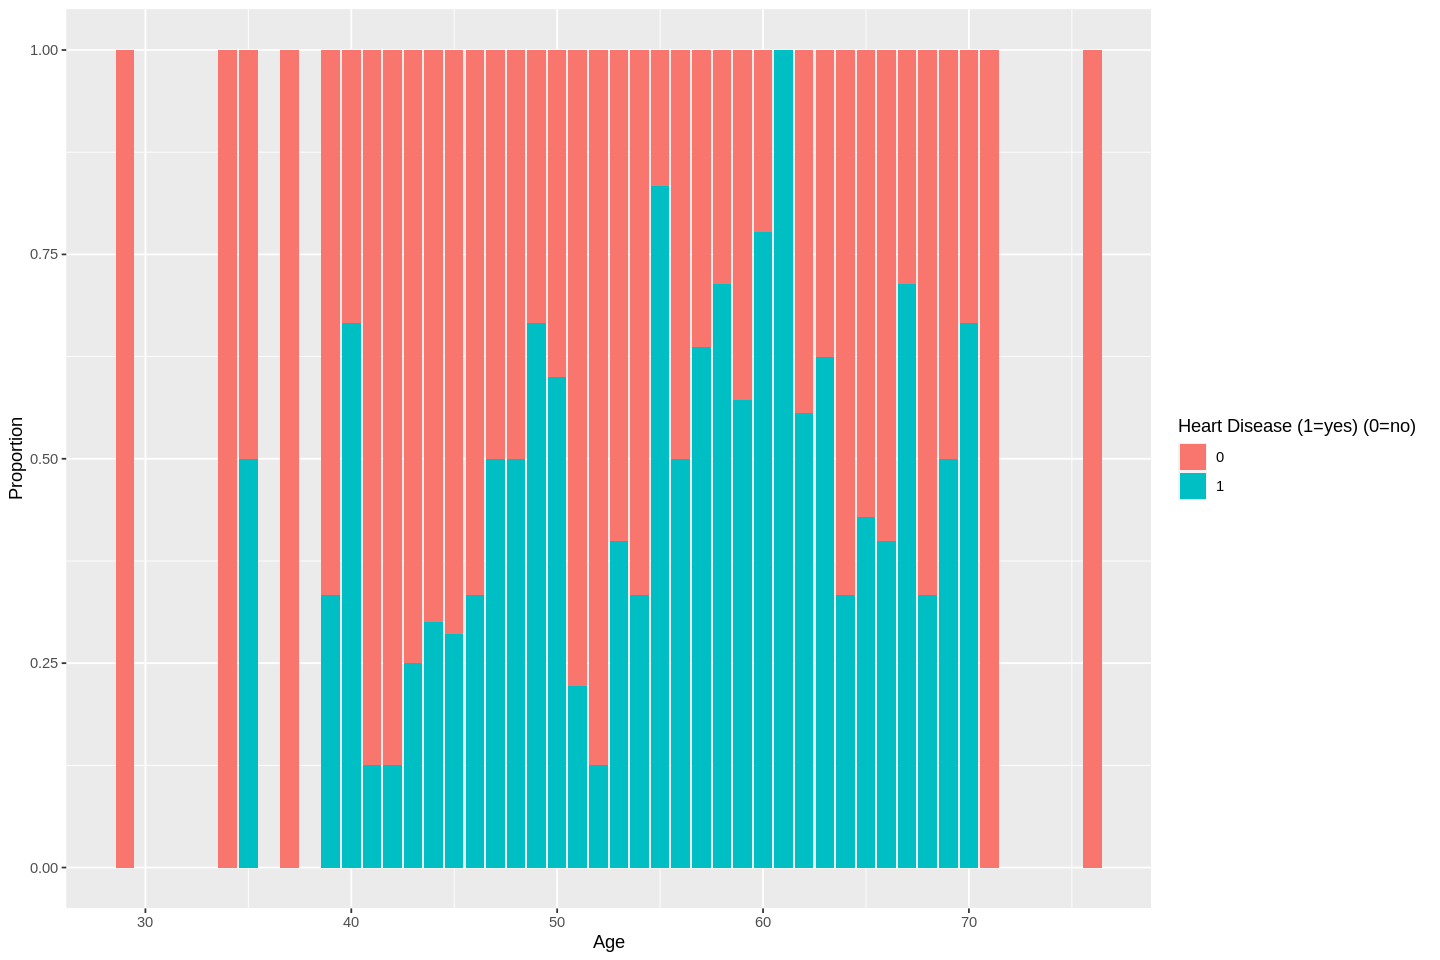

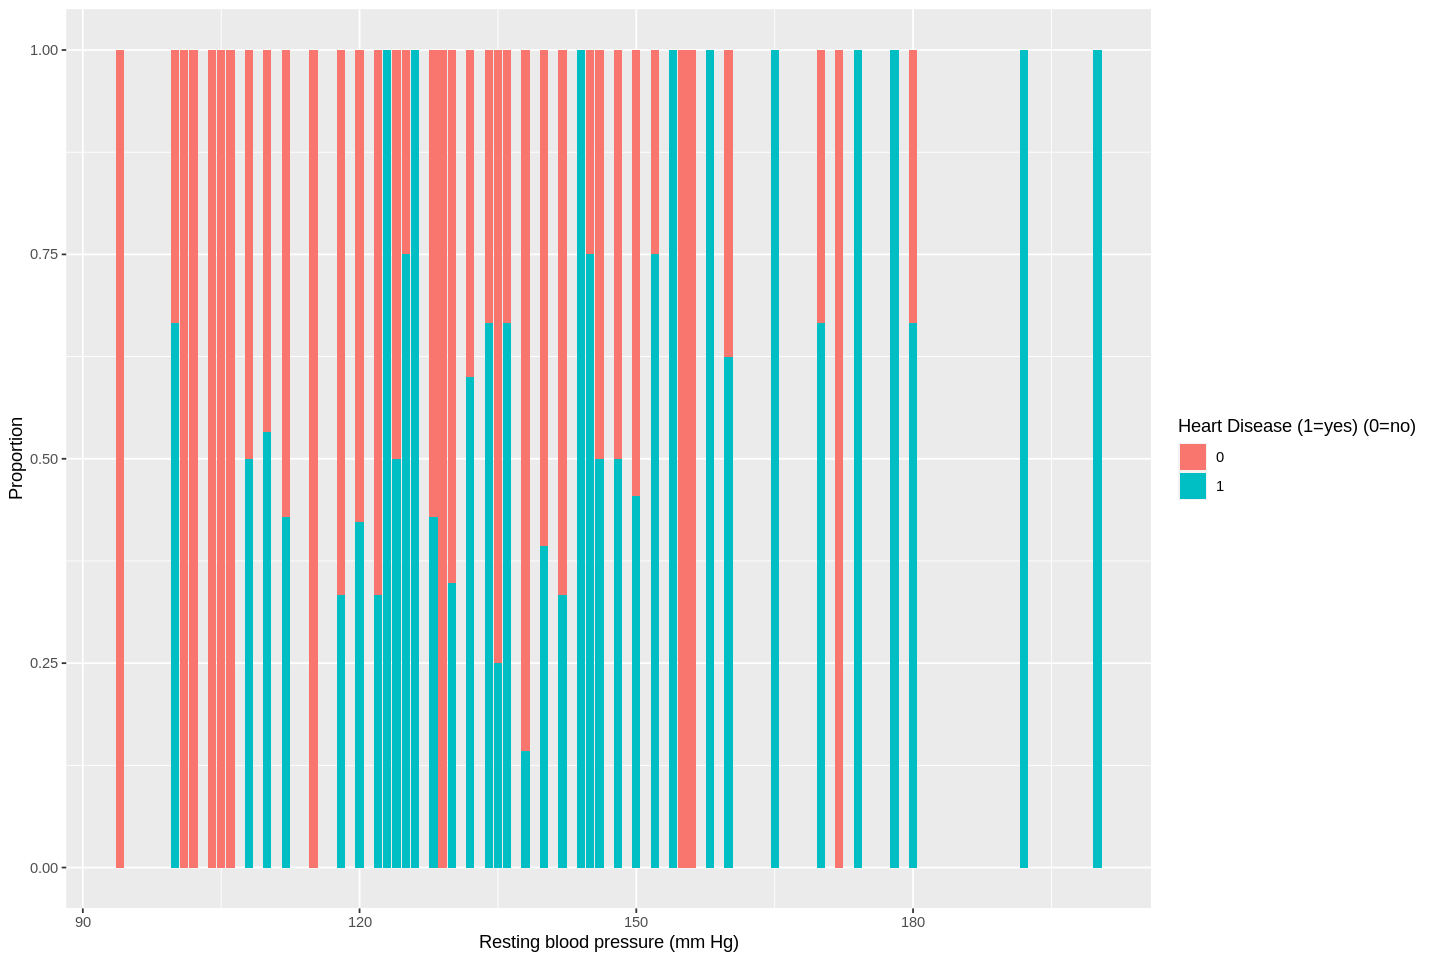

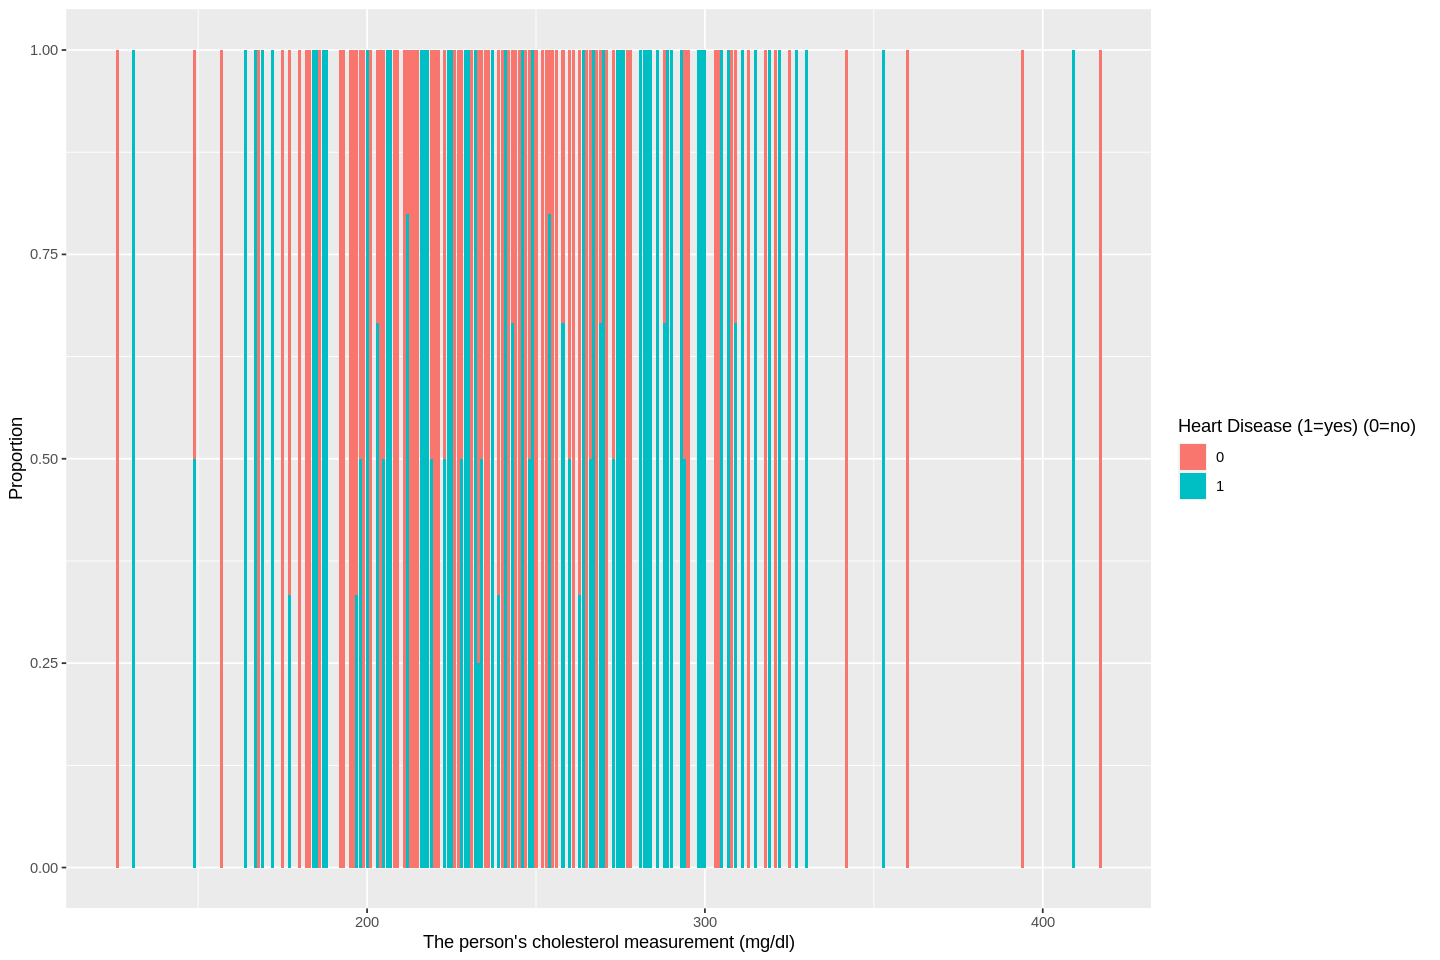

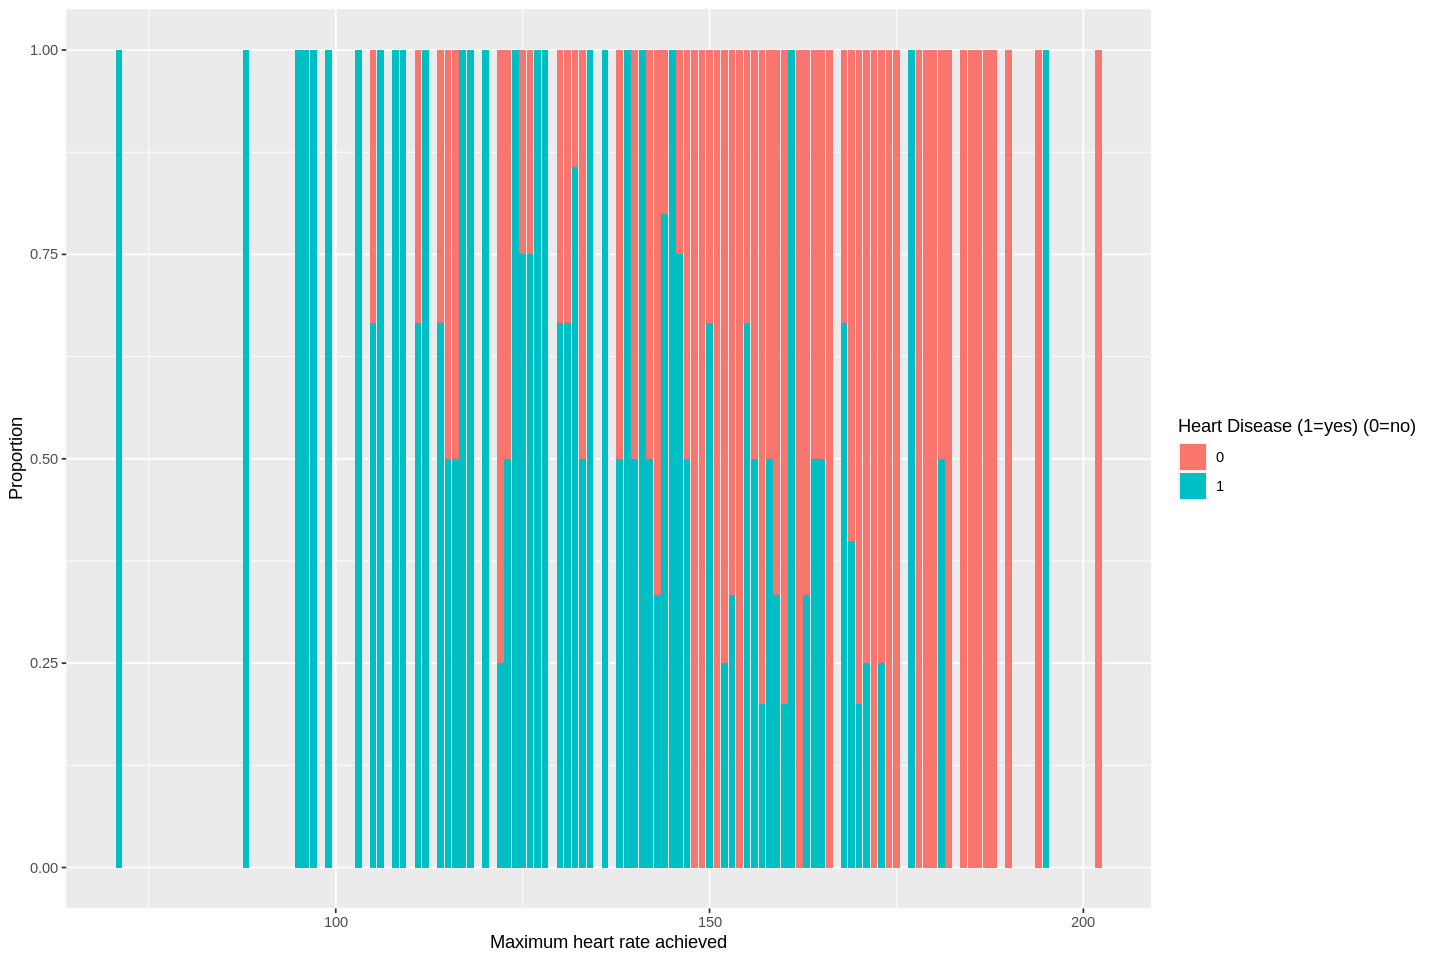

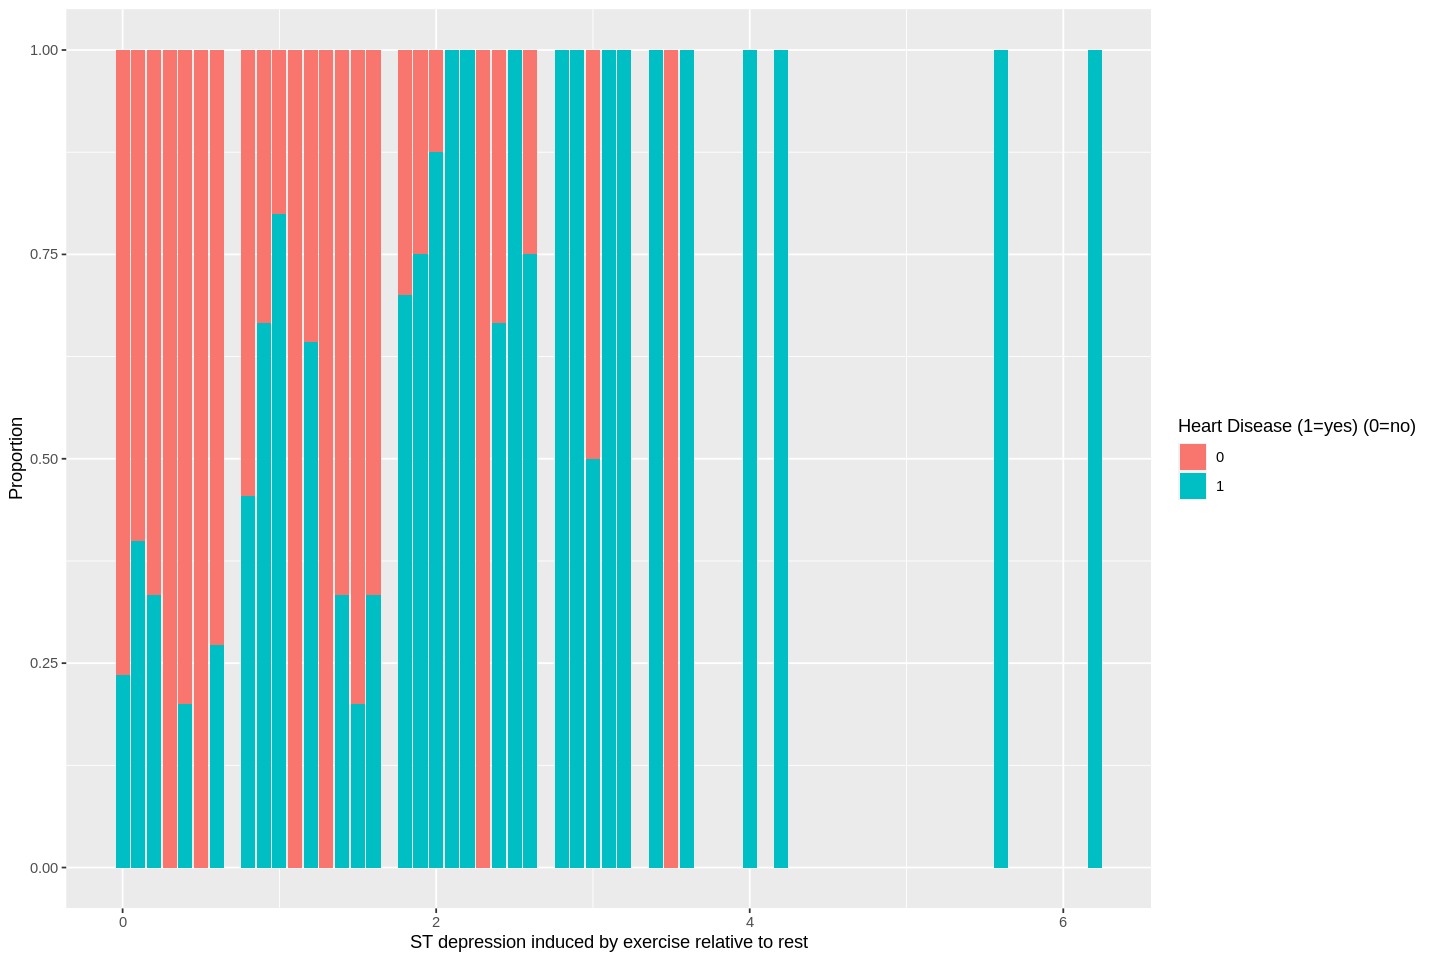

In [8]:
options(repr.plot.height = 8, repr.plot.width = 12)

age_plot <- heart_train |>
    ggplot(aes(x = age, fill = num)) + 
    geom_bar(position = 'fill') +
    xlab('Age') +
    ylab('Proportion') +
    labs(fill = 'Heart Disease (1=yes) (0=no)') 

age_plot

trestbps_plot <- heart_train |>
    ggplot(aes(x = trestbps, fill = num)) + 
    geom_bar(position = 'fill') +
    xlab('Resting blood pressure (mm Hg)') +
    ylab('Proportion') +
    labs(fill = 'Heart Disease (1=yes) (0=no)') 

trestbps_plot

chol_plot <- heart_train |>
    ggplot(aes(x = chol, fill = num)) + 
    geom_bar(position = 'fill') +
    xlab("The person's cholesterol measurement (mg/dl)") +
    ylab('Proportion') +
    labs(fill = 'Heart Disease (1=yes) (0=no)') 

chol_plot

thalach_plot <- heart_train |>
    ggplot(aes(x = thalach, fill = num)) + 
    geom_bar(position = 'fill') +
    xlab('Maximum heart rate achieved') +
    ylab('Proportion') +
    labs(fill = 'Heart Disease (1=yes) (0=no)') 

thalach_plot

oldpeak_plot <- heart_train |>
    ggplot(aes(x = oldpeak, fill = num)) + 
    geom_bar(position = 'fill') +
    xlab('ST depression induced by exercise relative to rest') +
    ylab('Proportion') +
    labs(fill = 'Heart Disease (1=yes) (0=no)') 

oldpeak_plot 

We also decided to use the numeric predictors to graph the proportion between people with heart disease and without over the values present in the variables. 
We believed this could be useful in determining which predictors are actually having an effect on heart disease at a certain interval. 
For example, in the age graph, the proportion of people with heart disease is higher in the 55-65 age range. 

# Methods

### Which variable to use:
* As mentioned earlier, we thought it would be best to stick to numeric variables as the classifications we have done in the past have relied on numeric predictors. 
* A 5-fold cross-validation will be used to ensure the highest accuracy of our model, and utilizing workflow() along with knn_tune() will allow us to pick the best k-value.
* To narrow down the numeric predictors that will be used, a method like the visualisations above will be used.

### To visualize:
* When determining the ideal k-value, a line graph will be used to represent the findings of our knn_tune. The final accuracy of our model will be presented in a table.

# Expected outcomes and significance:
### What do you expect to find?
* (replace with text)


### What impact could such findings have?
* (replace with text)


### What future questions could this lead to?
* (replace with text)


**Citations:**
* NCI Dictionary of Cancer Terms. (n.d.). National Cancer Institute. Retrieved October 29, 2022, from https://www.cancer.gov/publications/dictionaries/cancer-terms/def/heart-disease.
* Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 29, 2022, from https://www.cdc.gov/heartdisease/facts.htm 